**Contexto:**
O Combine é um evento realizado todos os anos no meio do Futebol Americano. Neste evento, jogadores de diversas posições e universidades são chamados para realização de exames e testes físicos para que os profissionais da NFL avaliem os atletas universitários que podem ser escolhidos no Draft.

Tabela retirada do site: (https://www.kaggle.com/datasets/redlineracer/nfl-combine-performance-data-2009-2019)

In [ ]:
!pip install --upgrade matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# carregando arquivo
df = pd.read_csv('https://raw.githubusercontent.com/xandeea/dados/main/NFL.csv')
pd.set_option('precision', 2)

In [3]:
# visualizando o arquivo
df.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.85,106.59,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.00,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.88,118.39,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.51,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.01,165.11,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.01,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.80,92.08,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.31,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.88,110.68,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.33,defense,line_backer,OLB,Yes


## **Tratando os dados**

In [4]:
# trocando os NaN da coluna
df['Drafted..tm.rnd.yr.'].fillna('0 / 0 / 0 / 0', inplace=True)

In [5]:
# separando a coluna em 4 novas colunas
df[['Team', 'Round', 'Pick', 'Year']] = df['Drafted..tm.rnd.yr.'].str.split(' / ', expand = True)

In [6]:
# retirando os caracteres, deixando apenas o número do Round
df['Round'] = df['Round'].str.replace('[th,st,rd,nd]', '', regex=True)

In [7]:
# retirando os caracteres, deixando apenas o número da Pick
df['Pick'] = df['Pick'].str.replace('[st pick, th pick, nd, rd]', '', regex=True)

In [8]:
# dropando a coluna que foi separada
df.drop(['Drafted..tm.rnd.yr.'], axis=1, inplace=True)

In [9]:
# corrigindo o nome dos atletas
df['Player'] = df['Player'].str.split(r'\\', expand = True)[0]

In [10]:
# convertendo a coluna Round para numérica
df['Round'] = df['Round'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              3477 non-null   object 
 1   Player            3477 non-null   object 
 2   Age               2927 non-null   float64
 3   School            3477 non-null   object 
 4   Height            3477 non-null   float64
 5   Weight            3477 non-null   float64
 6   Sprint_40yd       3303 non-null   float64
 7   Vertical_Jump     2780 non-null   float64
 8   Bench_Press_Reps  2572 non-null   float64
 9   Broad_Jump        2749 non-null   float64
 10  Agility_3cone     2260 non-null   float64
 11  Shuttle           2337 non-null   float64
 12  BMI               3477 non-null   float64
 13  Player_Type       3477 non-null   object 
 14  Position_Type     3477 non-null   object 
 15  Position          3477 non-null   object 
 16  Drafted           3477 non-null   object 


In [12]:
# verificando quais as possíveis posições
df['Position'].unique()

array(['RB', 'DE', 'OG', 'FS', 'OLB', 'DT', 'OT', 'CB', 'SS', 'TE', 'ILB',
       'C', 'FB', 'WR', 'P', 'K', 'QB', 'LS', 'S', 'DB'], dtype=object)

In [13]:
# verificando quais jogadores foram classificados como DB (que pode ser tanto Safety como CornerBack)
df[df['Position'] == 'DB']

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Player_Type,Position_Type,Position,Drafted,Team,Round,Pick
2054,2018,Minkah Fitzpatrick,21.0,Alabama,1.85,91.17,4.46,83.82,14.0,307.34,NaN,NaN,26.52,defense,defensive_back,DB,Yes,Miami Dolphins,1,11
3279,0,Quenton Meeks,21.0,Stanford,1.88,92.99,NaN,99.06,11.0,325.12,6.72,4.23,26.32,defense,defensive_back,DB,No,0,0,0


In [14]:
# como eram apenas 2 jogadores, vou colocar a posição que eles tem jogado na NFL
df.loc[df['Player'] == 'Minkah Fitzpatrick', 'Position'] = "S"
df.loc[df['Player'] == 'Quenton Meeks', 'Position'] = "CB"

In [15]:
# visualizando o novo arquivo
df.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Player_Type,Position_Type,Position,Drafted,Team,Round,Pick
0,2009,Beanie Wells,20.0,Ohio St.,1.85,106.59,4.38,85.09,25.0,325.12,NaN,NaN,31.00,offense,backs_receivers,RB,Yes,Arizona Cardinals,1,31
1,2009,Will Davis,22.0,Illinois,1.88,118.39,4.84,83.82,27.0,292.10,7.38,4.45,33.51,defense,defensive_lineman,DE,Yes,Arizona Cardinals,6,204
2,2009,Herman Johnson,24.0,LSU,2.01,165.11,5.50,NaN,21.0,NaN,NaN,NaN,41.01,offense,offensive_lineman,OG,Yes,Arizona Cardinals,5,167
3,2009,Rashad Johnson,23.0,Alabama,1.80,92.08,4.49,93.98,15.0,304.80,7.09,4.23,28.31,defense,defensive_back,FS,Yes,Arizona Cardinals,3,95
4,2009,Cody Brown,22.0,Connecticut,1.88,110.68,4.76,92.71,26.0,304.80,7.10,4.40,31.33,defense,line_backer,OLB,Yes,Arizona Cardinals,2,63


## **Visualizando os dados**

Entendendo as posições da NFL:

![](https://drive.google.com/uc?export=view&id=1ypPxotsIWumx3LE9ML4zXmPSulh1N9sR)


*Fonte: Wikipedia*

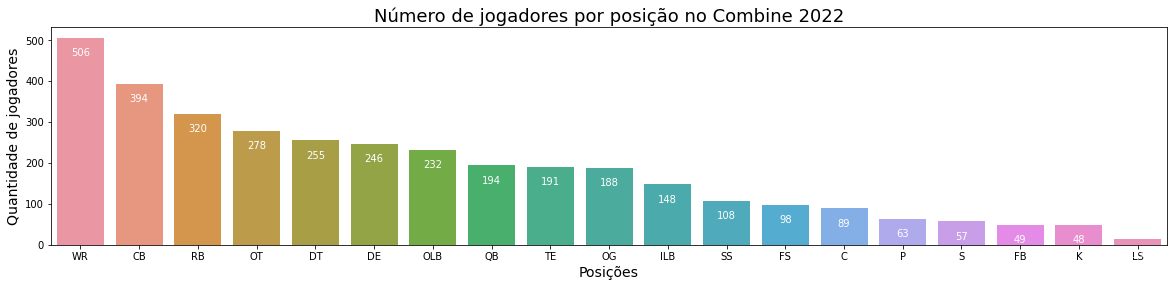

In [120]:
plt.figure(figsize=(20,4))
fig = sns.countplot(data = df, x = 'Position', order = df['Position'].value_counts().index)
fig.set_title('Número de jogadores por posição no Combine 2022', fontsize=18)
fig.set_xlabel('Posições', fontsize=14)
fig.set_ylabel('Quantidade de jogadores', fontsize=14)
fig.bar_label(fig.containers[0], padding=-20, color='white')
plt.show()

Jogadores variados de diversas posições, bem distribuidos entre jogadores de ataque e defesa, porém com baixo número de jogadores de Special Teams (P, K, LS)

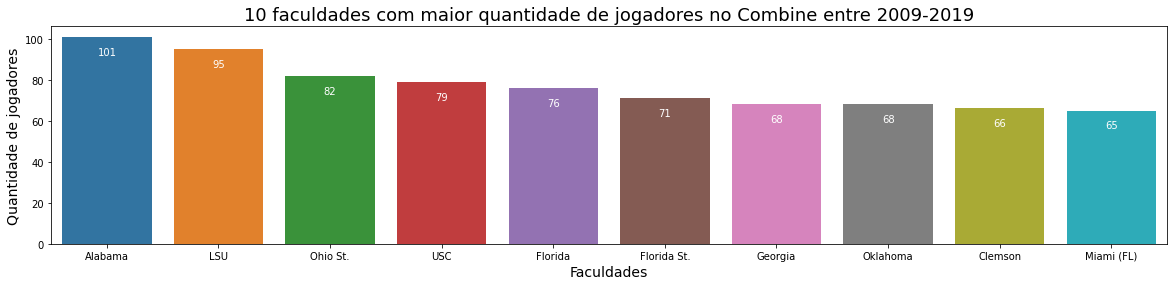

In [121]:
plt.figure(figsize=(20,4))
fig = sns.countplot(data = df, x = 'School', order = df['School'].value_counts()[:10].index)
fig.set_title('10 faculdades com maior quantidade de jogadores no Combine entre 2009-2019', fontsize=18)
fig.set_xlabel('Faculdades', fontsize=14)
fig.set_ylabel('Quantidade de jogadores', fontsize=14)
fig.bar_label(fig.containers[0], padding=-20, color='white')
plt.show()

No College Football, cada universidade pertence a alguma conferência. Dentre os jogadores convidados para os combines de 2009-2019: 

A conferência com o maior número de jogadores é a SEC, com 5 universidades (Alabama, LSU, USC, Florida e Georgia). 

Depois temos a ACC com 3 universidades (Florida State, Clemson e Miami).

As outras duas universidades restantes são da Big Ten (Ohio State) e da Big 12 (Oklahoma)

In [18]:
# Criando um dataframe com as médias de cada teste por Posição
medias_por_posicao = df.groupby('Position').mean().reset_index()

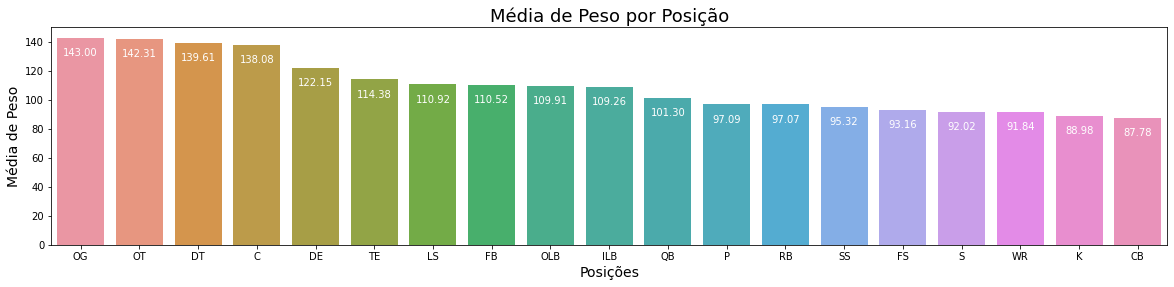

In [122]:
plt.figure(figsize=(20,4))
fig = sns.barplot(data = medias_por_posicao.sort_values('Weight', ascending=False), x = 'Position', y = 'Weight')
fig.set_title('Média de Peso por Posição', fontsize=18)
fig.set_xlabel('Posições', fontsize=14)
fig.set_ylabel('Média de Peso', fontsize=14)
fig.bar_label(fig.containers[0], padding=-20, color='white', fmt = '%.2f')
plt.show()

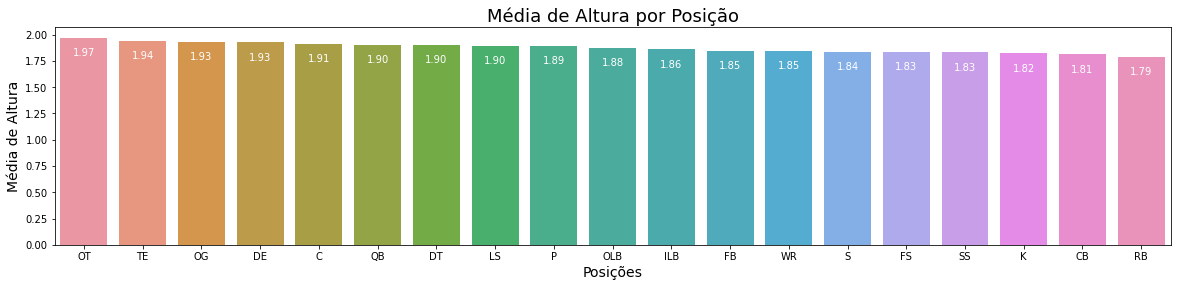

In [123]:
plt.figure(figsize=(20,4))
fig = sns.barplot(data = medias_por_posicao.sort_values('Height', ascending=False), x = 'Position', y = 'Height')
fig.set_title('Média de Altura por Posição', fontsize=18)
fig.set_xlabel('Posições', fontsize=14)
fig.set_ylabel('Média de Altura', fontsize=14)
fig.bar_label(fig.containers[0], padding=-20, color='white', fmt = '%.2f')
plt.show()

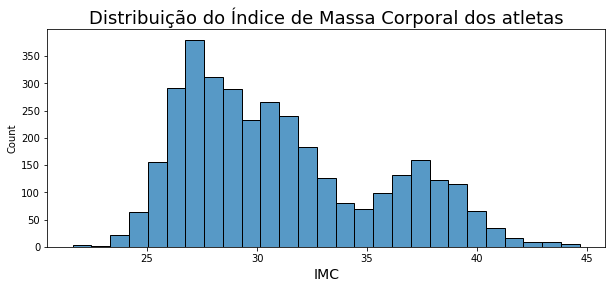

In [124]:
plt.figure(figsize=(10,4))
fig = sns.histplot(data = df, x = 'BMI')
fig.set_title('Distribuição do Índice de Massa Corporal dos atletas', fontsize=18)
fig.set_xlabel('IMC', fontsize=14)
plt.show()

Podemos observar que em relação a altura, não há grandes diferenças por posição, enquanto por peso, os jogadores mais pesados são os de linha ofensiva e defensiva

Em relação a distribuição do IMC, podemos ver que ele está distorcido a direita, ou seja, a maior parte dos atletas possui um IMC entre 25 e 30. De acordo com a faixa de IMC¹ esses valores já são considerados como sobrepeso. Podemos observar também que existe uma quantidade razoável de atletas com obesidade. Isso é um fator que deve ser observado, pois apesar de performarem bem, cada vez mais tem sido comum o problema de obesidade, hipertensão e apneia do sono em jogadores aposentados².

¹ https://www.programasaudefacil.com.br/calculadora-de-imc

² https://www1.folha.uol.com.br/esporte/2019/01/obesidade-vira-flagelo-de-ex-jogadores-de-futebol-americano.shtml

## **Correlação**

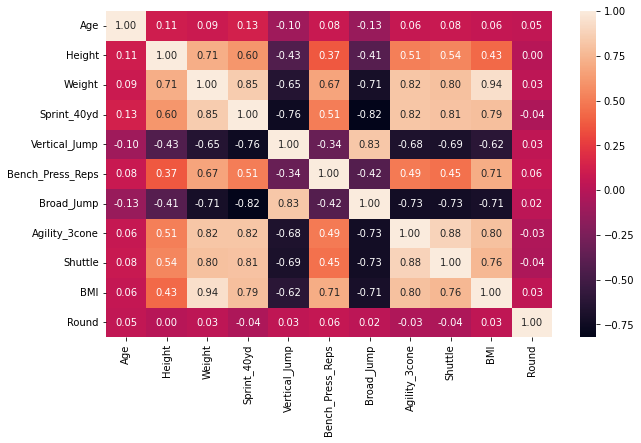

In [119]:
fig = sns.heatmap(data = df.corr(), annot = True, fmt = '.2f' )
fig.figure.set_size_inches(10,6)

## **Analisando os Cornerbacks (CB)**

Os cornerbacks são uma posição importante na NFL. Eles tem como objetivo impedir que o passe do Quarterback chegue no recebedor,conter corridas do Running Back ou até mesmo atacar o QB com objetivo de derrubá-lo.

Para isso, provas de velocidade e agilidade são importantes, além do salto vertical para disputar as bolas no alto.

Para o tiro de 40 jardas, um resultado considerado bom para os CBs são entre 4.45 to 4.6 segundos.
Em relação ao exercício de 3 cones, entre 6.83 to 6.99 segundos.
Já o salto, resultados entre 90 e 95 centímetros. ¹

¹ https://www.nfl.com/news/what-to-watch-for-at-2022-nfl-scouting-combine


In [112]:
# filtrando apenas a posição de CornerBack
cb = df.loc[(df['Position'] == 'CB')] 

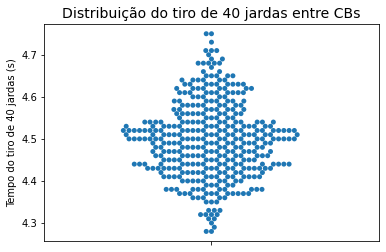

In [197]:
fig = sns.swarmplot(data = cb, y = 'Sprint_40yd')
fig.set_title('Distribuição do tiro de 40 jardas entre CBs', fontsize=14)
fig.set_ylabel('Tempo do tiro de 40 jardas (s)', fontsize=10)
plt.show()

Aqui, podemos observar que a maioria dos atletas encontra-se na faixa esperada.

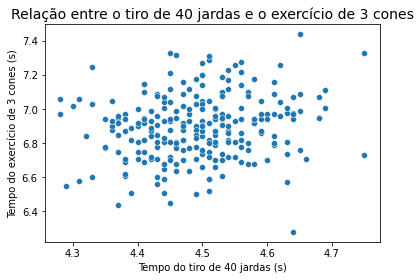

In [196]:
fig = sns.scatterplot (data = cb, x = 'Sprint_40yd', y = 'Agility_3cone')
fig.set_title('Relação entre o tiro de 40 jardas e o exercício de 3 cones', fontsize=14)
fig.set_ylabel('Tempo do exercício de 3 cones (s)', fontsize=10)
fig.set_xlabel('Tempo do tiro de 40 jardas (s)', fontsize=10)
plt.show()

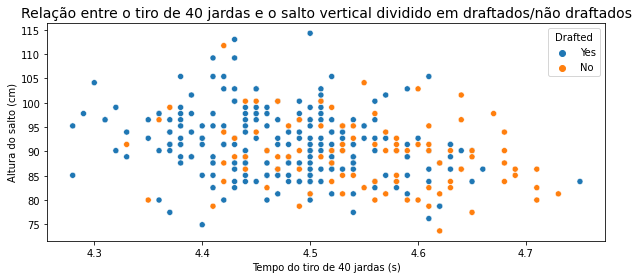

In [203]:
plt.figure(figsize=(10,4))
fig = sns.scatterplot (data = cb, x = 'Sprint_40yd', y = 'Vertical_Jump', hue = 'Drafted')
fig.set_title('Relação entre o tiro de 40 jardas e o salto vertical dividido em draftados/não draftados', fontsize=14)
fig.set_ylabel('Altura do salto (cm)', fontsize=10)
fig.set_xlabel('Tempo do tiro de 40 jardas (s)', fontsize=10)
plt.show()

Verificando a relação do tiro de 40 jardas com as outras 2 provas (exercício de 3 cones e salto vertical) não conseguimos observar um padrão de relação. Também não é possível ver uma relação muito forte com o fato do jogador ter sido Draftado ou não.

## **Comparando os grupos de Offensive Tackle (OT) vs Defensive End (DE)**

Dois grupos de posições que constantemente se enfrentam durante um jogo de Futebol Americano são os Defensive Ends vs Offensive Tackles. Vamos verificar as diferenças nos testes entre essas duas posições.

In [23]:
# filtrando apenas as duas posições
ot_de = df.loc[((df['Position'] == 'OT') | (df['Position'] == 'DE'))]

# selecionando as colunas dos testes para serem analisadas
cols_testes = ['Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI']

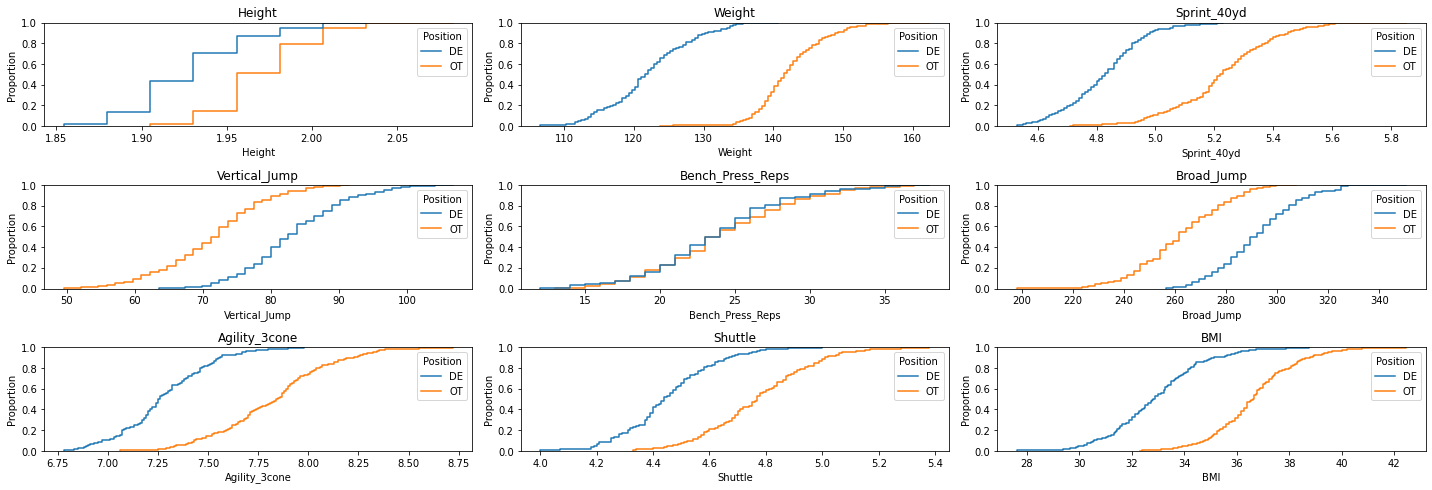

In [24]:
# criando um loop para plotar um gráfico ecdf de todas as colunas dos testes
a = len(cols_testes)
b = 3
c = 1

fig = plt.figure(figsize=(20,20))

for i in cols_testes:
    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.ecdfplot(data = ot_de, x = i, hue = 'Position')
    c = c + 1
plt.tight_layout()

Observando os gráficos acimas, percebemos que apesar de serem duas posições que estão sempre se enfrentando, elas apresentam diferenças físicas. A maior similaridade foi no teste de força, com o levantamento de peso.

Os Defensive Ends tiveram desempenho melhor em provas que testam mais a agilidade/velocidade (Tiro de 40 jardas, Shuttle, Exercício de Três Cones), os Offensive Tackles mostraram que em média são maiores e mais pesados, além de bons desempenhos nos saltos, que testa a força dos membros inferiores e também o equilíbrio.¹

Essas diferenças são resultados esperados, visto que o objetivo do DE é avançar e passar pelo OT para chegar no Quarterback (QB). Para isso, irá precisar de movimentos rápidos. Enquanto o OT deve se manter firme e em equilibrio, deixando o DE cada vez mais longe do seu QB.

¹ https://nfldraftbrasil.wordpress.com/2014/02/14/especial-combine-os-testes/


## **Observando o desempenho dos jogadores da Universidade de Wisconsin com Plotly**


In [145]:
# selecionando apenas os jogadores de Wisconsin
wisconsin = df.loc[df['School'] == 'Wisconsin']

In [142]:
# verificando quantas linhas e colunas tem o novo dataframe
wisconsin.shape

(51, 20)

In [159]:
fig = px.histogram(wisconsin, x = 'Position').update_xaxes(categoryorder="total descending")
fig.update_layout(
    title_text='Quantidade de Jogadores da universidade de Wisconsin que participaram do Combine entre 2009-2019',
    xaxis_title_text='Posições',
    yaxis_title_text='Quantidade de Jogadores',
)
fig.show()

In [182]:
fig = px.treemap(wisconsin, path = ['Drafted', 'Position'])
fig.show()

De acordo com o especialista David M. Hale da ESPN, Wisconsin costuma produzir bons atletas nas posições de Running Back (RB), jogadores de linha ofensiva (OT, OG e C) e Tight End (TE)¹. Podemos observar que essas posições se destacam entre os jogadores convidados pelo Combine. 

Além disso, a posição de OLB também tem tido bons resultados, além de ser uma posição com muitos convites, também são jogadores que vem sendo escolhidos no Draft.

¹ https://www.espn.com/college-football/story/_/id/29601197/position-u-20-which-schools-produce-most-college-football-talent-position

In [185]:
fig = px.scatter(wisconsin, x = 'Height', y = 'Weight', color = 'Position')
fig.update_layout(
    title_text='Relação entre Peso e Altura dos jogadores por Posição',
    xaxis_title_text='Altura',
    yaxis_title_text='Peso',
)
fig.show()

Aqui, podemos verificar que os jogadores mais altos e mais pesados são os de linha Ofensiva e Defensiva, enquanto os mais leves e mais baixos são de posições que requerem mais agilidade e velocidade, como RBs, CBs, S

In [206]:
fig = px.box(wisconsin, y='Age')
fig.update_layout(
    title_text='Boxplot da idade dos jogadores de Wisconsin',
    yaxis_title_text='Idade'
)
fig.show()

Podemos observar que as idades costumam estar concentradas entre 22 e 23 anos.

## **Conclusão**

Pelo fato do Combine convidar apenas alguns atletas e outros decidirem não participar, a quantidade de dados é baixa. Além disso, existem algumas posições que não tem necessidade de realizar alguns tipos de testes. Portanto, a análise pode não ser tão precisa.

Por fim, cabe lembrar que o resultado para um jogador ser draftado ou não não depende apenas dos seus resultados no Combine, mas também são feitas diversas entrevistas e observações dos jogos durante a sua carreira universitária. Aqui, o que foi feito foi uma análise geral de cada teste, além do que cada posição costuma apresentar